In [1]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', size = 24)
plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize':'x-large',
                     'ytick.labelsize':'x-large',
                     'legend.fontsize':'x-large'})

%matplotlib inline

# The functions to read the spectra, define the class run and details are in
# run.py
import run as r
import plotting as pl

import os

## Access file where data is stored
home = os.getcwd()
home = home.replace('/PRD_1903.08585', '')   # remove PRD_1903.08585 in case it is the current directory already
dir0 = home + '/PRD_1903.08585/'
os.chdir(dir0)

In [2]:
# Define every run that we want to analyze and initialize the class run
# which also reads the spectra and the time series
runs = {}                           # Initialize dictionary for the different runs to be analyzed
def initialize_run(run_name):
    run = r.run(run_name, dir0, quiet=True)
    runs.update({run_name:run})
    
initialize_run('ini1')
initialize_run('ini2')
initialize_run('ini3')
initialize_run('hel1')
initialize_run('hel2')
initialize_run('hel3')
initialize_run('noh1')
initialize_run('noh2')
initialize_run('ac1')
initialize_run('ac2')
initialize_run('ac3')

Reading run ini1

Reading run ini2

Reading run ini3

Reading run hel1

Reading run hel2

Reading run hel3

Reading run noh1

Reading run noh2

Reading run ac1

Reading run ac2

Reading run ac3



In [3]:
# We can store the runs in variables run1, run2, ... for easier access
# These are all stored in the dictionary given for runs
ini1 = runs.get('ini1')
ini2 = runs.get('ini2')
ini3 = runs.get('ini3')
hel1 = runs.get('hel1')
hel2 = runs.get('hel2')
hel3 = runs.get('hel3')
noh1 = runs.get('noh1')
noh2 = runs.get('noh2')
ac1  = runs.get('ac1')
ac2  = runs.get('ac2')
ac3  = runs.get('ac3')

In [4]:
# The runs that have been read can be seen as follows
print([s for s in runs.keys()])

# To check the directories that are avaible one can run
#r.read_dirs()

['ini1', 'ini2', 'ini3', 'hel1', 'hel2', 'hel3', 'noh1', 'noh2', 'ac1', 'ac2', 'ac3']


In [5]:
# computes some characteristics of the run (as kf, OmMmax, vAmax, ...)
ini1.characterize_run(min_col=-2, max_col=-.9)
for i in runs:
    
    run = runs.get(i)
    lM = True
    if 'ac' in runs.get(i).name_run:
        lM = False
    if run.name_run != 'ini1':
        run.characterize_run(min_col=-2, max_col=-1.5, lM=lM)
# to see this, uncomment the following lines
print('The elements stored in ini2 are: ')
print([s for s in ini2.__dict__.keys()])

# The available quantities in time_series, as a function of time are
print('\n The elements stored in time series for ini2 are: ')
print([s for s in ini2.ts.keys()])

The elements stored in ini2 are: 
['name_run', 'dir_run', 'spectra', 'spectra_avail', 'ts', 'OmMmax', 'tini', 'color', 'kf', 'vA', 'te']

 The elements stored in time series for ini2 are: 
['it', 't', 'dt', 'EEK', 'EEM', 'EEGW', 'hrms', 'urms', 'brms', 'umax', 'bmax', 'hhTpt', 'hhXpt', 'bxpt', 'bypt', 'bzpt', 'uxpt', 'uypt', 'uzpt']


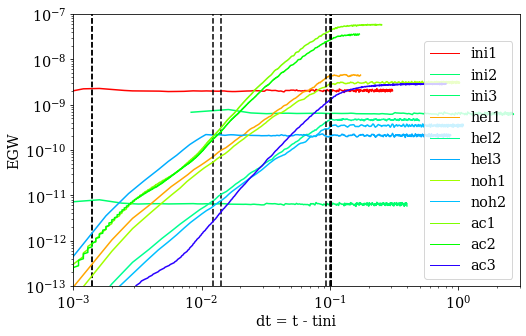

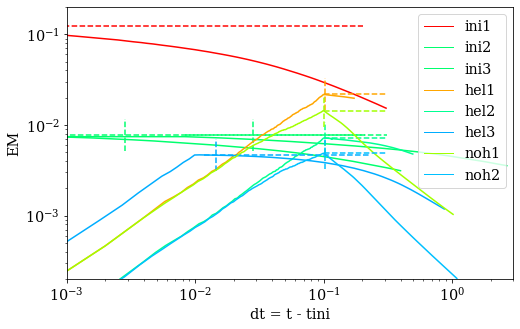

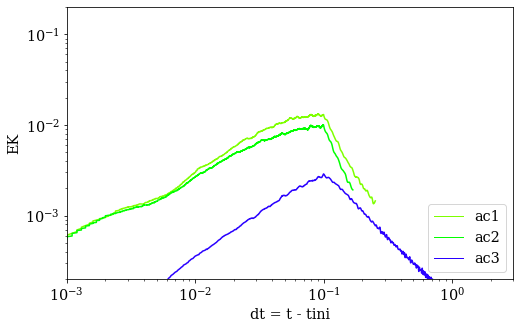

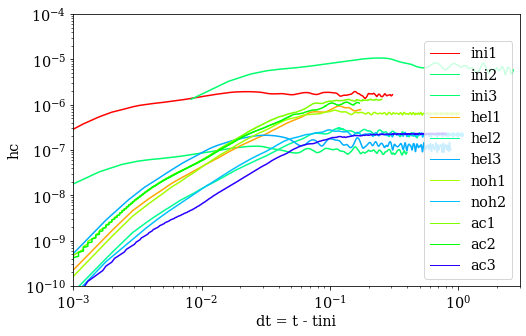

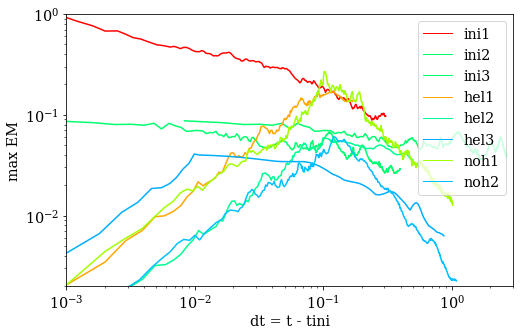

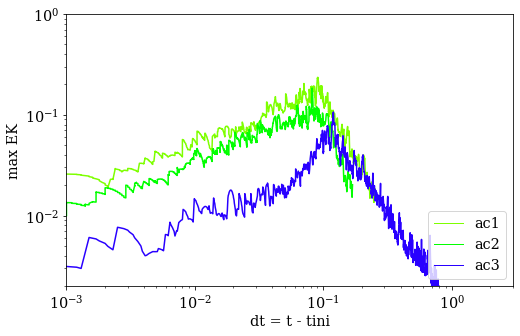

In [6]:
for i in runs:
    
    lM = True; lK = False
    if 'ac' in runs.get(i).name_run:
        lM = False; lK = True
    j = pl.EEM_EEK_EEGW_vs_t(runs.get(i), lhc=True, lEKmax=True, lEMmax=True, EM0=2e-4, EM1=2e-1,
                     EGW0=1e-13, EGW1=1e-7, t0=1e-3, EK0=2e-4, EK1=2e-1, t1=3e0, hc0=1e-10, hc1=1e-4,
                     ET0=1e-6, ET1=0.2, EMmax0=2e-3, EMmax1=1e0, EKmax0=2e-3, EKmax1=1., lM=lM, lK=lK)
    
# Assign legend for plots (see cell below for clarification on colors)
legs, legs_m, legs_k, cl, cl_m, cl_k = pl.legends_PRD(runs)
for i in range(1, j + 2):
    plt.figure(i)
    if i == 1 or i == 4:
        plt.legend(cl, legs, loc = 'lower right')
    elif i == 2 or i == 5:
        plt.legend(cl_m, legs_m, loc = 'upper right')
    elif i == 3 or i == 6:
        plt.legend(cl_k, legs_k, loc = 'lower right')
    #else:
    #    plt.legend(cl, legs, loc = 'best')
plt.close(7)
plt.close(8)

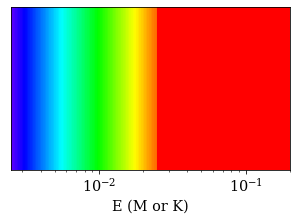

In [7]:
# The palette of colors used for the plot of the different runs is the following,
# where the initial energy density of the turbulent sourcing, determines the color of
# the corresponding lines
pl.palette_colors()